In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [2]:
# Load our data set
x_train = np.array([
    7.420, 8.960, 9.960, 7.500, 7.420, 7.500, 8.580, 16.200, 8.100, 5.750, 13.200, 6.000, 6.550, 3.500, 7.800, 6.000, 6.600, 8.500, 4.600, 6.420, 4.320, 7.155, 8.050, 4.560, 8.800, 6.540, 
    6.000, 8.875, 7.950, 5.500, 7.475, 7.000, 4.880, 5.960, 6.840, 7.000, 7.482, 9.000, 6.000, 6.000, 6.550, 6.360, 6.480, 6.000, 6.000, 6.000, 6.000, 6.600, 4.300, 7.440, 7.440, 6.325, 
    6.000, 5.150, 6.000, 6.000, 11.440, 9.000, 7.680, 6.000, 6.000, 8.880, 6.240, 6.360, 11.175, 8.880, 13.200, 7.700, 6.000, 12.090, 4.000, 6.000, 5.020, 6.600, 4.040, 4.260, 6.420, 6.500, 
    5.700, 6.000, 6.000, 4.000, 10.500, 6.000, 3.760, 8.250, 6.670, 3.960, 7.410, 8.580, 5.000, 6.750, 4.800, 7.200, 6.000, 4.100, 9.000, 6.400, 6.600, 6.000, 6.600, 5.500, 5.500, 6.350, 
    5.500, 4.500, 5.450, 6.420, 3.240, 6.615, 6.600, 8.372, 4.300, 9.620, 6.800, 8.000, 6.900, 3.700, 6.420, 7.020, 6.540, 7.231, 6.254, 7.320, 6.525, 15.600, 7.160, 6.500, 5.500, 11.460, 
    4.800, 5.828, 5.200, 4.800, 7.000, 6.000, 5.400, 4.640, 5.000, 6.360, 5.800, 6.660, 10.500, 4.800, 4.700, 5.000, 10.500, 5.500, 6.360, 6.600, 5.136, 4.400, 5.400, 3.300, 3.650, 6.100, 
    6.900, 2.817, 7.980, 3.150, 6.210, 6.100, 6.600, 6.825, 6.710, 6.450, 7.800, 4.600, 4.260, 6.540, 5.500, 10.269, 8.400, 5.300, 3.800, 9.800, 8.520, 6.050, 7.085, 3.180, 4.500, 7.200, 
    3.410, 7.980, 3.000, 3.000, 11.410, 6.100, 5.720, 3.540, 7.600, 10.700, 6.600, 4.800, 8.150, 4.410, 7.686, 2.800, 5.948, 4.200, 4.520, 4.095, 4.120, 5.400, 4.770, 6.300, 5.800, 3.000, 
    2.970, 6.720, 4.646, 12.900, 3.420, 4.995, 4.350, 4.160, 6.040, 6.862, 4.815, 7.000, 8.100, 3.420, 9.166, 6.321, 10.240, 6.440, 5.170, 6.000, 3.630, 9.667, 5.400, 4.320, 3.745, 4.160, 
    3.880, 5.680, 2.870, 5.010, 4.510, 4.000, 3.840, 3.760, 3.640, 2.550, 5.320, 5.360, 3.520, 8.400, 4.100, 4.990, 3.510, 3.450, 9.860, 3.520, 4.510, 5.885, 4.000, 8.250, 4.040, 6.360, 
    3.162, 3.510, 3.750, 3.968, 4.900, 2.880, 4.880, 4.920, 4.950, 3.900, 4.500, 1.905, 4.075, 3.500, 6.450, 4.032, 4.400, 10.360, 3.400, 6.360, 6.360, 4.500, 2.175, 4.360, 7.770, 6.650, 
    2.787, 5.500, 5.040, 5.850, 2.610, 2.953, 2.747, 4.410, 4.000, 2.325, 4.600, 3.640, 5.800, 7.000, 4.079, 3.520, 2.145, 4.500, 8.250, 3.450, 4.840, 4.080, 4.046, 4.632, 5.985, 6.060, 
    3.600, 3.680, 4.040, 5.600, 5.900, 4.992, 4.340, 3.000, 4.320, 3.630, 3.460, 5.400, 4.500, 3.460, 4.100, 6.480, 4.500, 3.960, 4.050, 7.260, 5.500, 3.000, 3.290, 3.816, 8.080, 2.145, 
    3.780, 3.180, 5.300, 3.180, 7.152, 4.080, 3.850, 2.015, 2.176, 3.350, 3.150, 4.820, 3.420, 3.600, 5.830, 2.856, 8.400, 8.250, 2.520, 6.930, 3.480, 3.600, 4.040, 6.020, 4.050, 3.584, 
    3.120, 5.450, 3.630, 3.630, 5.640, 3.600, 4.280, 3.570, 3.180, 3.000, 3.520, 5.960, 4.130, 2.850, 2.275, 3.520, 4.500, 4.000, 3.150, 4.500, 4.500, 3.640, 3.850, 4.240, 3.650, 4.600, 
    2.135, 3.036, 3.990, 7.424, 3.480, 3.600, 3.640, 5.900, 3.120, 7.350, 3.512, 9.500, 5.880, 12.944, 4.900, 3.060, 5.320, 2.145, 4.000, 3.185, 3.850, 2.145, 2.610, 1.950, 4.040, 4.785, 
    3.450, 3.640, 3.500, 4.960, 4.120, 4.750, 3.720, 3.750, 3.100, 3.185, 2.700, 2.145, 4.040, 4.775, 2.500, 3.180, 6.060, 3.480, 3.792, 4.040, 2.145, 5.880, 4.500, 3.930, 3.640, 4.370, 
    2.684, 4.320, 3.120, 3.450, 3.986, 3.500, 4.095, 1.650, 3.450, 6.750, 9.000, 3.069, 4.500, 5.495, 2.398, 3.000, 3.850, 3.500, 8.100, 4.960, 2.160, 3.090, 4.500, 3.800, 3.090, 3.240, 
    2.835, 4.600, 5.076, 3.750, 3.630, 8.050, 4.352, 3.000, 5.850, 4.960, 3.600, 3.660, 3.480, 2.700, 3.150, 6.615, 3.040, 3.630, 6.000, 5.400, 5.200, 3.300, 4.350, 2.640, 2.650, 3.960, 
    6.800, 4.000, 4.000, 3.934, 2.000, 3.630, 2.800, 2.430, 3.480, 4.000, 3.185, 4.000, 2.910, 3.600, 4.400, 3.600, 2.880, 3.180, 3.000, 4.400, 3.000, 3.210, 3.240, 3.000, 3.500, 4.840, 
    7.700, 3.635, 2.475, 2.787, 3.264, 3.640, 3.180, 1.836, 3.970, 3.970, 1.950, 5.300, 3.000, 2.400, 3.000, 3.360, 3.420, 1.700, 3.649, 2.990, 3.000, 2.400, 3.620, 2.910, 3.850])

y_train = np.array([
    13300.000, 12250.000, 12250.000, 12215.000, 11410.000, 10850.000, 10150.000, 10150.000, 9870.000, 9800.000, 9800.000, 9681.000, 9310.000, 9240.000, 9240.000,
    9100.000, 9100.000, 8960.000, 8890.000, 8855.000, 8750.000, 8680.000, 8645.000, 8645.000, 8575.000, 8540.000, 8463.000, 8400.000, 8400.000, 8400.000, 8400.000,
    8400.000, 8295.000, 8190.000, 8120.000, 8080.940, 8043.000, 7980.000, 7962.500, 7910.000, 7875.000, 7840.000, 7700.000, 7700.000, 7560.000, 7560.000, 7525.000,
    7490.000, 7455.000, 7420.000, 7420.000, 7420.000, 7350.000, 7350.000, 7350.000, 7350.000, 7343.000, 7245.000, 7210.000, 7210.000, 7140.000, 7070.000, 7070.000,
    7035.000, 7000.000, 6930.000, 6930.000, 6895.000, 6860.000, 6790.000, 6790.000, 6755.000, 6720.000, 6685.000, 6650.000, 6650.000, 6650.000, 6650.000, 6650.000,
    6650.000, 6629.000, 6615.000, 6615.000, 6580.000, 6510.000, 6510.000, 6510.000, 6475.000, 6475.000, 6440.000, 6440.000, 6419.000, 6405.000, 6300.000, 6300.000,
    6300.000, 6300.000, 6300.000, 6293.000, 6265.000, 6230.000, 6230.000, 6195.000, 6195.000, 6195.000, 6160.000, 6160.000, 6125.000, 6107.500, 6090.000, 6090.000,
    6090.000, 6083.000, 6083.000, 6020.000, 6020.000, 6020.000, 5950.000, 5950.000, 5950.000, 5950.000, 5950.000, 5950.000, 5950.000, 5950.000, 5943.000, 5880.000,
    5880.000, 5873.000, 5873.000, 5866.000, 5810.000, 5810.000, 5810.000, 5803.000, 5775.000, 5740.000, 5740.000, 5740.000, 5740.000, 5740.000, 5652.500, 5600.000,
    5600.000, 5600.000, 5600.000, 5600.000, 5600.000, 5600.000, 5600.000, 5600.000, 5565.000, 5565.000, 5530.000, 5530.000, 5530.000, 5523.000, 5495.000, 5495.000,
    5460.000, 5460.000, 5460.000, 5460.000, 5425.000, 5390.000, 5383.000, 5320.000, 5285.000, 5250.000, 5250.000, 5250.000, 5250.000, 5250.000, 5250.000, 5250.000,
    5250.000, 5250.000, 5243.000, 5229.000, 5215.000, 5215.000, 5215.000, 5145.000, 5145.000, 5110.000, 5110.000, 5110.000, 5110.000, 5075.000, 5040.000, 5040.000,
    5040.000, 5040.000, 5033.000, 5005.000, 4970.000, 4970.000, 4956.000, 4935.000, 4907.000, 4900.000, 4900.000, 4900.000, 4900.000, 4900.000, 4900.000, 4900.000,
    4900.000, 4900.000, 4900.000, 4900.000, 4900.000, 4893.000, 4893.000, 4865.000, 4830.000, 4830.000, 4830.000, 4830.000, 4795.000, 4795.000, 4767.000, 4760.000,
    4760.000, 4760.000, 4753.000, 4690.000, 4690.000, 4690.000, 4690.000, 4690.000, 4690.000, 4655.000, 4620.000, 4620.000, 4620.000, 4620.000, 4620.000, 4613.000,
    4585.000, 4585.000, 4550.000, 4550.000, 4550.000, 4550.000, 4550.000, 4550.000, 4550.000, 4543.000, 4543.000, 4515.000, 4515.000, 4515.000, 4515.000, 4480.000,
    4480.000, 4480.000, 4480.000, 4480.000, 4473.000, 4473.000, 4473.000, 4445.000, 4410.000, 4410.000, 4403.000, 4403.000, 4403.000, 4382.000, 4375.000, 4340.000,
    4340.000, 4340.000, 4340.000, 4340.000, 4319.000, 4305.000, 4305.000, 4277.000, 4270.000, 4270.000, 4270.000, 4270.000, 4270.000, 4270.000, 4235.000, 4235.000,
    4200.000, 4200.000, 4200.000, 4200.000, 4200.000, 4200.000, 4200.000, 4200.000, 4200.000, 4200.000, 4200.000, 4200.000, 4200.000, 4200.000, 4200.000, 4200.000,
    4200.000, 4200.000, 4193.000, 4193.000, 4165.000, 4165.000, 4165.000, 4130.000, 4130.000, 4123.000, 4098.500, 4095.000, 4095.000, 4095.000, 4060.000, 4060.000,
    4060.000, 4060.000, 4060.000, 4025.000, 4025.000, 4025.000, 4007.500, 4007.500, 3990.000, 3990.000, 3990.000, 3990.000, 3990.000, 3920.000, 3920.000, 3920.000,
    3920.000, 3920.000, 3920.000, 3920.000, 3885.000, 3885.000, 3850.000, 3850.000, 3850.000, 3850.000, 3850.000, 3850.000, 3850.000, 3836.000, 3815.000, 3780.000,
    3780.000, 3780.000, 3780.000, 3780.000, 3780.000, 3773.000, 3773.000, 3773.000, 3745.000, 3710.000, 3710.000, 3710.000, 3710.000, 3710.000, 3703.000, 3703.000,
    3675.000, 3675.000, 3675.000, 3675.000, 3640.000, 3640.000, 3640.000, 3640.000, 3640.000, 3640.000, 3640.000, 3640.000, 3640.000, 3633.000, 3605.000, 3605.000,
    3570.000, 3570.000, 3570.000, 3570.000, 3535.000, 3500.000, 3500.000, 3500.000, 3500.000, 3500.000, 3500.000, 3500.000, 3500.000, 3500.000, 3500.000, 3500.000,
    3500.000, 3500.000, 3500.000, 3500.000, 3500.000, 3500.000, 3493.000, 3465.000, 3465.000, 3465.000, 3430.000, 3430.000, 3430.000, 3430.000, 3430.000, 3430.000,
    3423.000, 3395.000, 3395.000, 3395.000, 3360.000, 3360.000, 3360.000, 3360.000, 3360.000, 3360.000, 3360.000, 3360.000, 3353.000, 3332.000, 3325.000, 3325.000,
    3290.000, 3290.000, 3290.000, 3290.000, 3290.000, 3290.000, 3290.000, 3290.000, 3255.000, 3255.000, 3234.000, 3220.000, 3220.000, 3220.000, 3220.000, 3150.000,
    3150.000, 3150.000, 3150.000, 3150.000, 3150.000, 3150.000, 3150.000, 3150.000, 3143.000, 3129.000, 3118.850, 3115.000, 3115.000, 3115.000, 3087.000, 3080.000,
    3080.000, 3080.000, 3080.000, 3045.000, 3010.000, 3010.000, 3010.000, 3010.000, 3010.000, 3010.000, 3010.000, 3003.000, 2975.000, 2961.000, 2940.000, 2940.000,
    2940.000, 2940.000, 2940.000, 2940.000, 2940.000, 2940.000, 2870.000, 2870.000, 2870.000, 2870.000, 2852.500, 2835.000, 2835.000, 2835.000, 2800.000, 2800.000,
    2730.000, 2730.000, 2695.000, 2660.000, 2660.000, 2660.000, 2660.000, 2660.000, 2660.000, 2660.000, 2653.000, 2653.000, 2604.000, 2590.000, 2590.000, 2590.000,
    2520.000, 2520.000, 2520.000, 2485.000, 2485.000, 2450.000, 2450.000, 2450.000, 2450.000, 2450.000, 2450.000, 2408.000, 2380.000, 2380.000, 2380.000, 2345.000,
    2310.000, 2275.000, 2275.000, 2275.000, 2240.000, 2233.000, 2135.000, 2100.000, 2100.000, 2100.000, 1960.000, 1890.000, 1890.000, 1855.000, 1820.000, 1767.150,
    1750.000, 1750.000, 1750.000
])   #target value

In [3]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [4]:
def compute_gradient(x, y, w, b): 
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

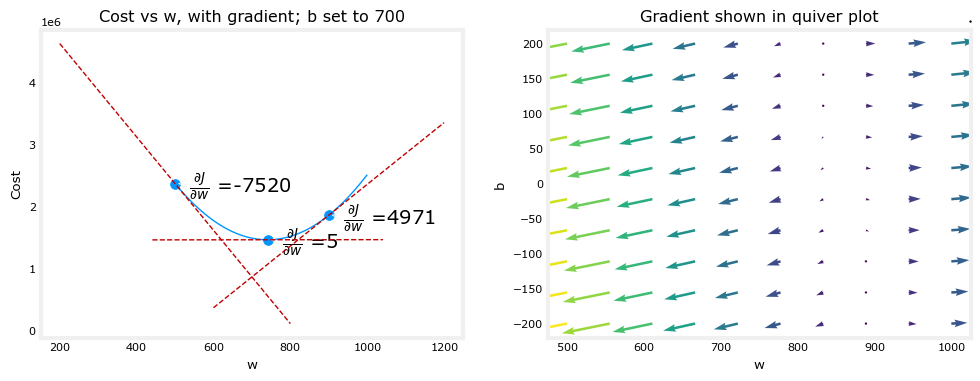

In [5]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [6]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [7]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 50000
tmp_alpha = 1.0e-4
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.30e+07  dj_dw: -2.674e+04, dj_db: -4.771e+03   w:  2.674e+00, b: 4.77122e-01
Iteration 5000: Cost 1.57e+06  dj_dw:  5.099e+01, dj_db: -3.078e+02   w:  8.087e+02, b: 2.98082e+02
Iteration 10000: Cost 1.53e+06  dj_dw:  4.739e+01, dj_db: -2.860e+02   w:  7.841e+02, b: 4.46456e+02
Iteration 15000: Cost 1.49e+06  dj_dw:  4.405e+01, dj_db: -2.658e+02   w:  7.613e+02, b: 5.84348e+02
Iteration 20000: Cost 1.45e+06  dj_dw:  4.093e+01, dj_db: -2.470e+02   w:  7.401e+02, b: 7.12500e+02
Iteration 25000: Cost 1.42e+06  dj_dw:  3.804e+01, dj_db: -2.296e+02   w:  7.203e+02, b: 8.31598e+02
Iteration 30000: Cost 1.40e+06  dj_dw:  3.536e+01, dj_db: -2.134e+02   w:  7.020e+02, b: 9.42283e+02
Iteration 35000: Cost 1.38e+06  dj_dw:  3.286e+01, dj_db: -1.983e+02   w:  6.849e+02, b: 1.04515e+03
Iteration 40000: Cost 1.36e+06  dj_dw:  3.054e+01, dj_db: -1.843e+02   w:  6.691e+02, b: 1.14075e+03
Iteration 45000: Cost 1.34e+06  dj_dw:  2.838e+01, dj_db: -1.713e+02   w:  6.544e+02, b: 1.22

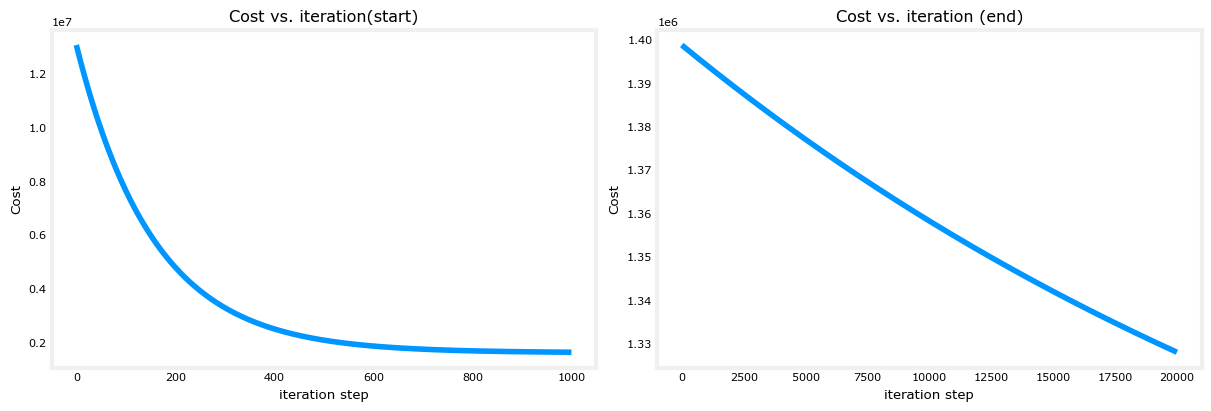

In [8]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:1000])
ax2.plot(0 + np.arange(len(J_hist[30000:])), J_hist[30000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [9]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 1952.8 Thousand dollars
1200 sqft house prediction 2081.0 Thousand dollars
2000 sqft house prediction 2593.5 Thousand dollars
